In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
#to read the csv file
df=pd.read_csv('cafe_sales_data.csv')

In [7]:
df


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [8]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
#to handle missing values

In [11]:
#to change the datatype of the column to Int
df['Quantity']=pd.to_numeric(df['Quantity'],errors='coerce').astype('Int64')

In [12]:
df['Price Per Unit']=pd.to_numeric(df['Price Per Unit'],errors='coerce')

In [13]:
df['Total Spent']=pd.to_numeric(df['Total Spent'],errors='coerce')

In [14]:
#to check for any missing values
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [15]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [16]:
df['Transaction ID'].nunique()

10000

In [25]:
#to check the number of unique values for each category
df['Item'].value_counts()

Juice       2140
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: Item, dtype: int64

In [19]:
df['Item'].mode()[0]

'Juice'

In [23]:
df['Item'].replace(['ERROR','UNKNOWN'],pd.NA,inplace=True)

In [24]:
#to replace missing values with mode
df['Item'].fillna(df['Item'].mode()[0],inplace=True)

In [26]:
df['Quantity'].nunique()

5

In [35]:
df['Quantity'].value_counts()

5    2013
2    1974
4    1863
3    1849
1    1822
Name: Quantity, dtype: Int64

In [36]:
df['Quantity'].isna().sum()

479

In [37]:
df['Quantity'].isnull().sum()

479

In [32]:
df['Quantity'].median()

3.0

In [33]:
df['Quantity'].mean()

3.028463396702027

In [38]:
#replacing missing values with median
df['Quantity'].fillna(df['Quantity'].median(),inplace=True)

In [39]:
df['Quantity'].value_counts()

3    2328
5    2013
2    1974
4    1863
1    1822
Name: Quantity, dtype: Int64

In [40]:
df['Price Per Unit'].value_counts()

3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
Name: Price Per Unit, dtype: int64

In [44]:
df['Price Per Unit'].isna().sum()

533

In [45]:
df['Price Per Unit'].median()

3.0

In [46]:
df['Price Per Unit'].mean()

2.949984155487483

In [47]:
df['Price Per Unit'].fillna(df['Price Per Unit'].median(),inplace=True)

In [49]:
df['Total Spent'].isna().sum()

502

In [50]:
df['Total Spent'].value_counts()

6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5     237
1.0     232
4.5     225
1.5     205
Name: Total Spent, dtype: int64

In [51]:
df['Total Spent'].median()

8.0

In [52]:
df['Total Spent'].mean()

8.924352495262161

In [53]:
df['Total Spent'].fillna(df['Total Spent'].median(),inplace=True)

In [54]:
df['Payment Method'].value_counts()

Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: Payment Method, dtype: int64

In [55]:
df['Payment Method'].isna().sum()

2579

In [56]:
df['Payment Method'].replace(['ERROR','UNKNOWN'],pd.NA,inplace=True)

In [57]:
df['Payment Method'].isna().sum()

3178

In [58]:
df['Payment Method'].mode()[0]

'Digital Wallet'

In [59]:
df['Payment Method'].fillna(df['Payment Method'].mode()[0],inplace=True)

In [60]:
df['Payment Method'].isna().sum()

0

In [61]:
df['Location'].value_counts()

Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: Location, dtype: int64

In [62]:
df['Location'].isna().sum()

3265

In [63]:
df['Location'].replace(['ERROR','UNKNOWN'],pd.NA,inplace=True)

In [64]:
df['Location'].mode()[0]

'Takeaway'

In [69]:
df['Location'].fillna(df['Location'].mode()[0],inplace=True)

In [75]:
df['Transaction Date'].isna().sum()

460

In [74]:
df['Transaction Date'].replace(['ERROR','UNKNOWN'],pd.NA,inplace=True)

In [84]:
df['Transaction Date'].mode()[0]

'2023-02-06'

In [87]:
df['Transaction Date'].fillna(df['Transaction Date'].mode()[0],inplace=True)

In [88]:
#changing the column datatype to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%Y-%m-%d')


In [89]:
#changing the datetime format to d-m-y
df['Transaction Date'] = df['Transaction Date'].dt.strftime('%d-%m-%Y')


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  Int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  10000 non-null  object 
dtypes: Int64(1), float64(2), object(5)
memory usage: 634.9+ KB


In [92]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,10000.000000,10000.00000,10000.00000
mean,3.027100,2.95265,8.87795
std,1.384614,1.24396,5.86059
min,1.000000,1.00000,1.00000
25%,2.000000,2.00000,4.00000
50%,3.000000,3.00000,8.00000
75%,4.000000,4.00000,12.00000
max,5.000000,5.00000,25.00000


In [ ]:
#handling outliers

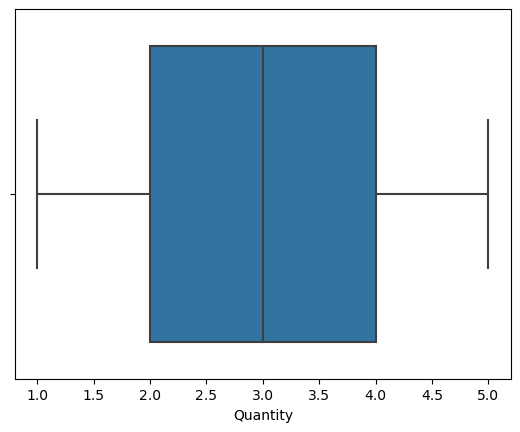

In [93]:
sns.boxplot(x = df['Quantity'])
plt.show()

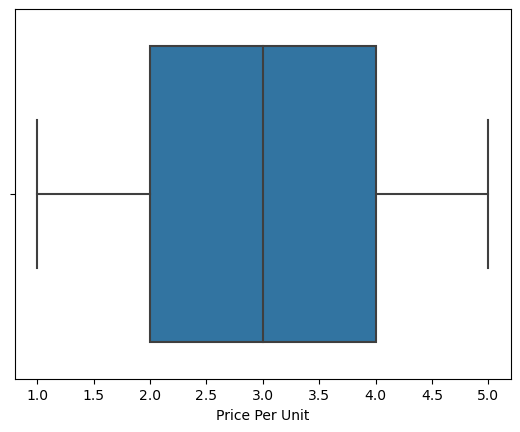

In [94]:
sns.boxplot(x = df['Price Per Unit'])
plt.show()

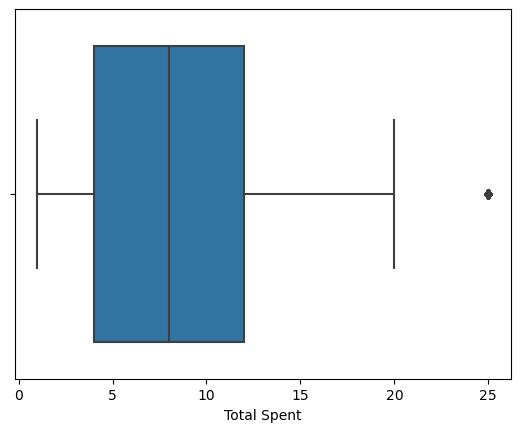

In [95]:
sns.boxplot(x = df['Total Spent'])
plt.show()

In [98]:
#replacing outliers with lower or upper extreme values
def capping(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [97]:
capping(df,df.drop(columns=['Transaction ID','Item','Payment Method','Location','Transaction Date']).columns)

In [ ]:
#To check and remove duplicates

In [100]:
df.duplicated().sum()

0

In [101]:
df.drop_duplicates()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,08-09-2023
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,16-05-2023
2,TXN_4271903,Cookie,4,1.0,8.0,Credit Card,In-store,19-07-2023
3,TXN_7034554,Salad,2,5.0,10.0,Digital Wallet,Takeaway,27-04-2023
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,11-06-2023
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,Digital Wallet,Takeaway,30-08-2023
9996,TXN_9659401,Juice,3,3.0,3.0,Digital Wallet,Takeaway,02-06-2023
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,Takeaway,02-03-2023
9998,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,Takeaway,02-12-2023


In [ ]:
#to download the cleaned file in csv format

In [103]:
df.to_csv('Cleaned cafe sales Data.csv')

In [ ]:
#to download the cleaned file in xlsx format

In [104]:
df.to_excel('Cleaned cafe sales Data.xlsx')